In [ ]:
!pip install tensorflow

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
#from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

## 1. READING DATA SET and FEATURE ELIMINATION

In [ ]:
# Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/Python Course/Churn.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Overview of Dataset**

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print (data.shape)
print (data.shape[0],'rows',data.shape[1],'columns')

(10000, 14)
10000 rows 14 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* This outcome shows that there are 10000 observations and 14 attributess.
* It is seen that there are no null values in any of the columns.
* All attributes are numerical except Surname, Geography and Gender.

In [ ]:
# checking null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Again, there is no null value in the dataset.

In [ ]:
# Checking missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There is no missing value in the dataset.

In [ ]:
# Checking duplicate customers
data['CustomerId'].nunique()

10000

* Number of customer id is 10000 which is equal to the number of observations so there is no dublicates in the dataset.

In [ ]:
# gives number of unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* There are 3 and 2 unique values for geography and gender so we can create dummy variables for them.
* The results show that there are many customers with the same surname. It is not important for our analysis.
* It seems we have two customers have exactly the same estimated salary.

In [ ]:
# Dropping RowNumber, CustomerId and Surname columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1 )

* RowNumber, CustomerId and Surname attributes are not important in our analysis. They do not contribute any possible value to explain the bank churn prediction.

## 2. EXPLORATORY DATA ANALYSIS (EDA)

### Data Balance Check

In [ ]:
data['Exited'].nunique()

2

* There are only 2 observations; 1 for exited, 0 for otherwise

In [ ]:
#checking the percentage of Exited observations in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* There are almost 80% not Exited and 20% Exited customers in the dataset. This shows that the data is not balanced.

<Axes: >

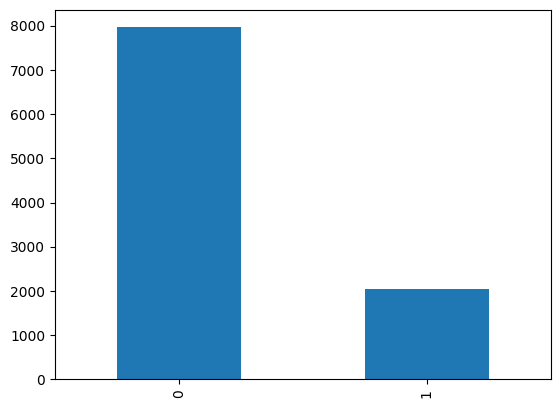

In [ ]:
#visual representation of unbalanced data
data.Exited.value_counts().plot.bar()

It is clearly shown that the Exited data is divided almost 80% not-Exited and 20% Exited.

In [ ]:
data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0
Exited,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


* Credit Score seems to be symmetric in which its mean and median are almost the same.
* Age has a wide distribution from the age os 18 to 92. Yet, there is only 2 years difference in its mean and median. There might be some outliers.
* Tenure and Estimated Salary have the same mean and median, and they seem to be normally distributed.
* Balance seems to be skewed to the right tail because there is 20000 dolars difference between its mean and median.
* Number of Products are in between 1 and 4. While its mean is 2, median is 1 which indicates that it s distribution is skewed to the right.
* Has Credit Card and Is Active Member attributes are binary variables taking 0 and 1. Both have a mean of 1 meaning that the customers have credit card and an active members, in average.
* Exited attribute is an outcome variable. It seems majority of customers continue having service from the bank.

### Univariate Analysis

Text(0.5, 1.0, 'Frequency Distribution Plot of Credit Scores')

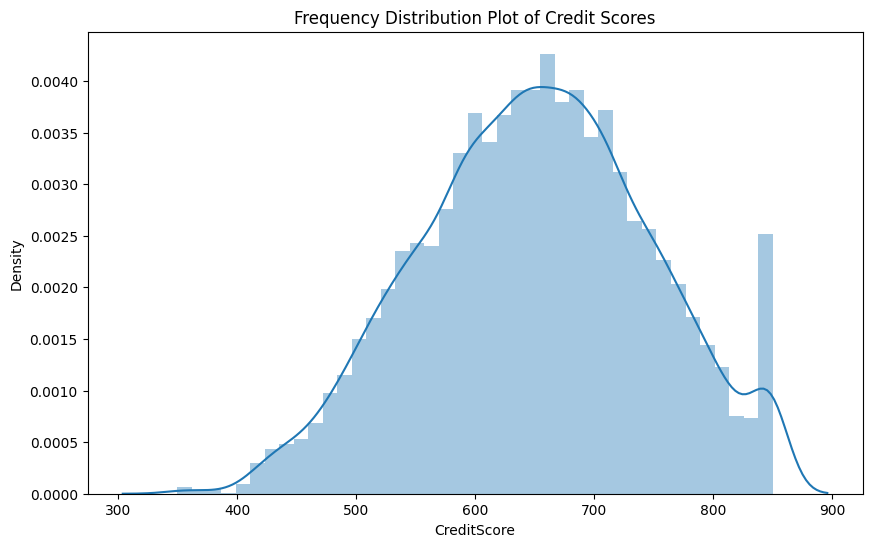

In [ ]:
import warnings
warnings.filterwarnings('ignore')
x = data.CreditScore
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Credit Scores')

* Credit score seems to have a symmetric distribution except the region of the credit score 850s. There appears to be some outliers on the left tail.

Text(0.5, 1.0, 'Frequency Distribution Plot of Age')

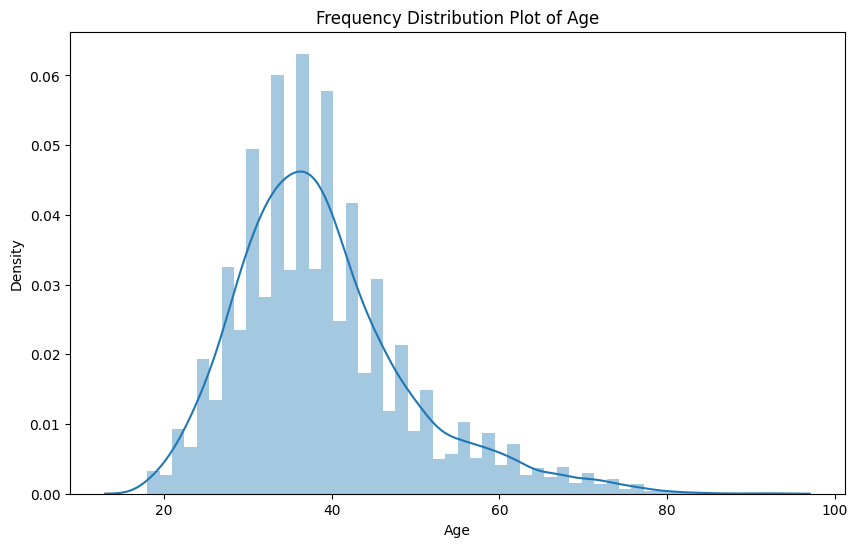

In [ ]:
x = data.Age
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Age')

* Age distribution is almost symmetric. It is skwed to the right tail.

Text(0.5, 1.0, 'Frequency Distribution Plot of Estimated Salary')

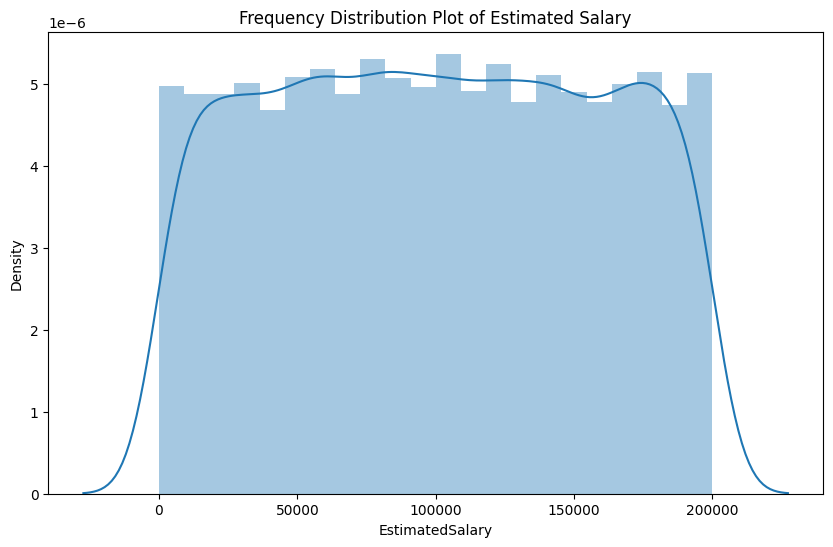

In [ ]:
x = data.EstimatedSalary
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Estimated Salary')

* Estimated salary is pretty solid shape, almost evenly distributed.

Text(0.5, 1.0, 'Frequency Distribution Plot of Balance')

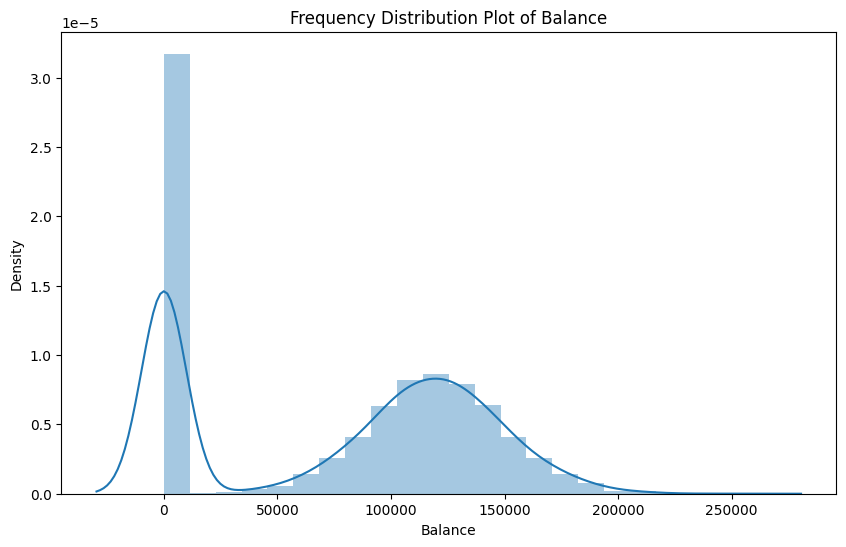

In [ ]:
x = data.Balance
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Balance')

* There are many customers with zero balance in their bank account. The rest of the customers creates a nice symmetric distribution but with skewed to the right tale.

In [ ]:
data['Geography'] = data['Geography'].astype(float)

ValueError: ignored

In [ ]:
for i in ['Geography', 'Gender','Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']:
      sns.countplot(data[i])
      plt.show()

ValueError: ignored

* The number of customers from Spain and Germany is very close to each other. Meanwhile, those from France has twice as many as the others.
* There is not much differences in the number of Males and Females.
* Tenure has a value between 0 and 10. The number of customers with tenure between 1 and 9 is ver close to each other.
* Majority of customers have either 1 or 2 accounts in the bank.
* Almost twice as many customer has bank's credit card compared to those who doesn't have.
* Data are almost equally devided in active and inactive members.

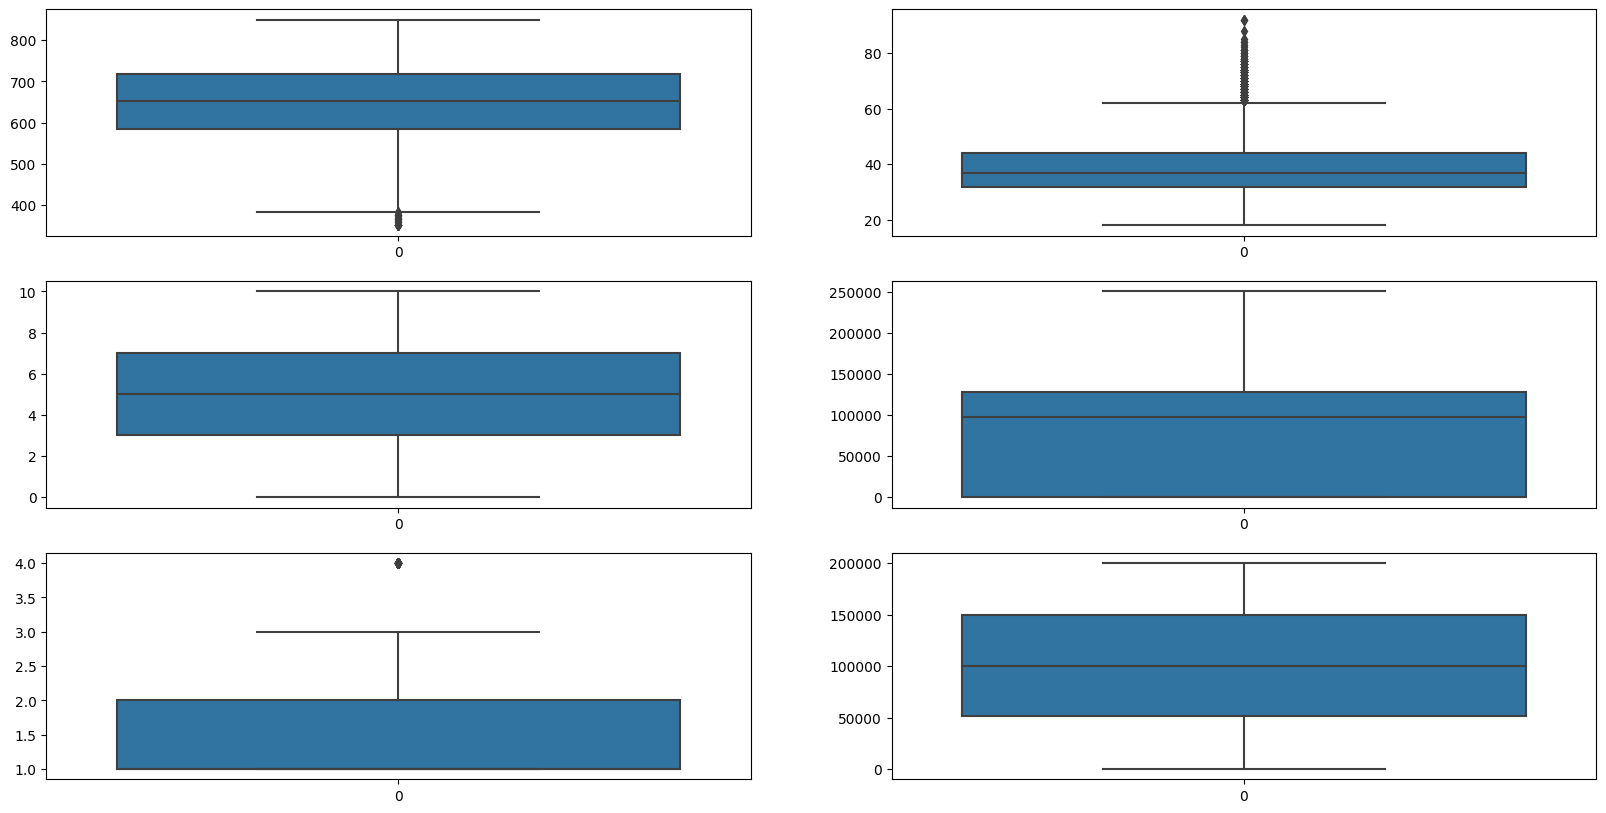

In [ ]:
# Boxplots
plt.figure(figsize= (20,10))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']:
    plt.subplot(3, 2, pos)
    sns.boxplot(data[i])
    pos+= 1

* As confirmed by the boxplot analysis, Age and Credit scores has some outliers on the right and left side, respectively.
* Estimated salary is evenly distributed between 50000 and 150000.
* The attribute number of products is mostly up to 2, and there is an outlier in it.

### Bivariate Analysis

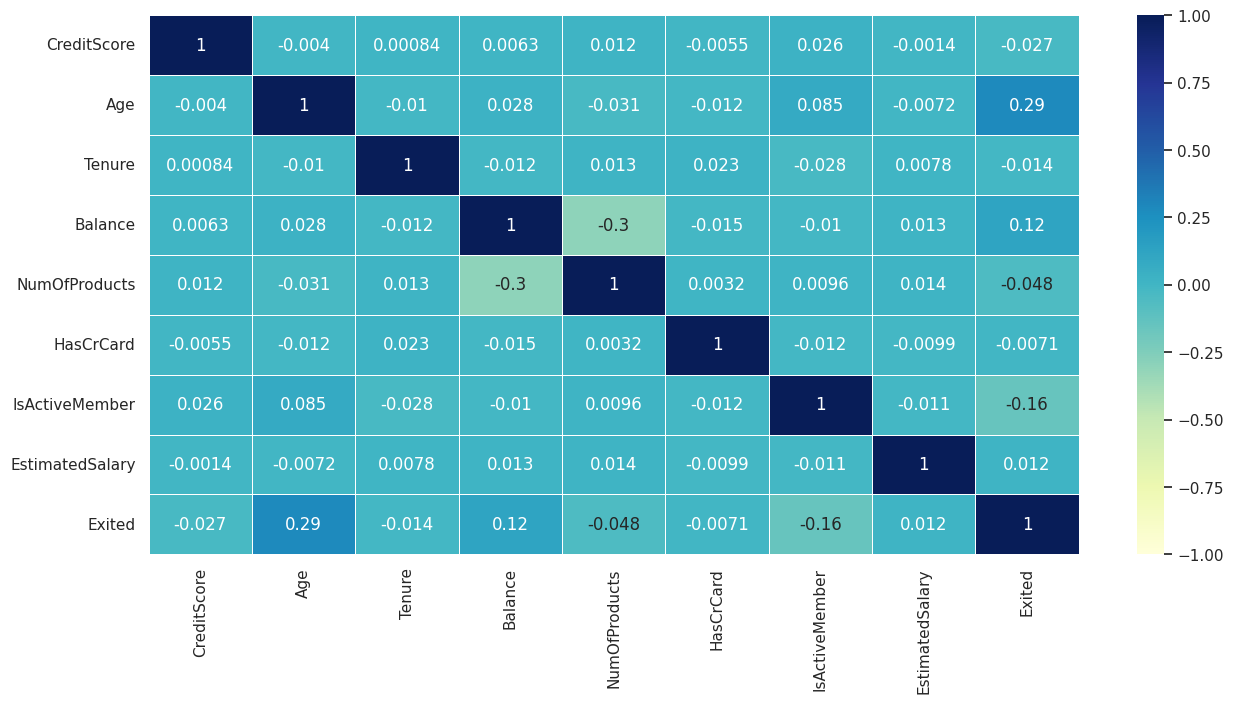

In [ ]:
#Heatmap
sns.set(rc={'figure.figsize':(15,7)})
all_col = data.iloc[:,:].columns.tolist()
sns.heatmap(data[all_col].corr(),
            annot=True,
            linewidths=.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap="YlGnBu")
plt.show()

* Heatmap analysis shows that there is no significant correlation between the attributes.

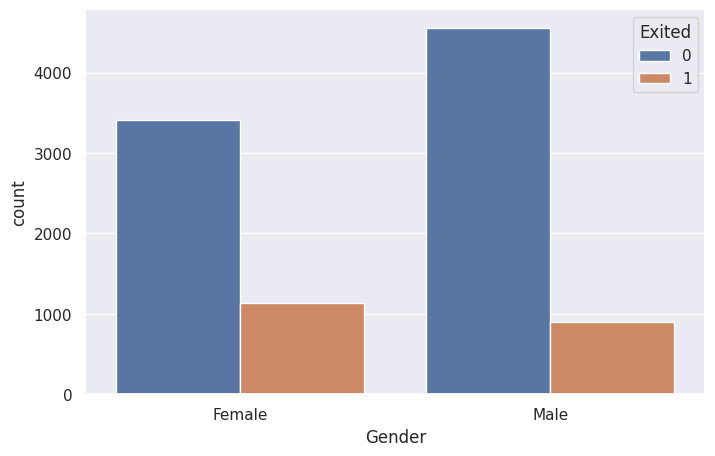

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.show()

* Number of female leavers (exiters) is more than the number of male leavers, but not significant.

* Number of leavers from France and Germany is more than those from Spain. If total number of customers is considered, then the leavers from Germany is much more than those from Spain and France, in percentage wise. From the highest to lowest number of leavers is Germany, Spain and France, in order.

In [ ]:

plt.figure(figsize=(12,5))
sns.countplot (x='Tenure',hue=data['Exited'])
plt.show()

ValueError: ignored

<Figure size 1200x500 with 0 Axes>

* Tenure does not seem to affect the number of leavers.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['NumOfProducts'],hue=data['Exited'])

ValueError: ignored

<Figure size 800x500 with 0 Axes>

* It is difficult to make a plausable comment on the number of products with 3 and 4, but we can visually see that number of leavers with 1 product is higher than those with 2 products.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['HasCrCard'],hue=data['Exited'])

ValueError: ignored

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['HasCrCard'],hue=data['Exited'])

ValueError: ignored

<Figure size 800x500 with 0 Axes>

* Number of leavers having credit card is more than those not having credit card. But, this can also be due to the fact that count of customers having credit card is more than those not having credit card.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['IsActiveMember'],hue=data['Exited'])

ValueError: ignored

<Figure size 800x500 with 0 Axes>

*  It seems that number of leavers who are not active member is more than those who are active member.

## 3. DATA PRE-PROCESSING

In [ ]:
#creating dummy variables for the categorical attributes (Geography and Gender)
data_org = data
data = pd.get_dummies(data,drop_first=True)
data = data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,1.0,0.0


In [ ]:
#Seperating the target variable and predictors
X_data = data[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']]
y_data = data['Exited']

In [ ]:
X_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,0.0,0.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0


In [ ]:
y_data

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float32

In [ ]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
X_data = StandardScaler().fit_transform(X_data)

In [ ]:
print(X_data.shape)
print(y_data.shape)

(10000, 11)
(10000,)


In [ ]:
X_data

array([[-0.3262214 ,  0.29351744, -1.0417597 , ..., -0.5787359 ,
        -0.57380915, -1.0959876 ],
       [-0.44003597,  0.19816384, -1.3875377 , ..., -0.5787359 ,
         1.7427398 , -1.0959876 ],
       [-1.5367941 ,  0.29351744,  1.0329077 , ..., -0.5787359 ,
        -0.57380915, -1.0959876 ],
       ...,
       [ 0.6049884 , -0.27860412,  0.68712986, ..., -0.5787359 ,
        -0.57380915, -1.0959876 ],
       [ 1.2568352 ,  0.29351744, -0.69598174, ...,  1.7279038 ,
        -0.57380915,  0.91241914],
       [ 1.4637709 , -1.0414329 , -0.35020387, ..., -0.5787359 ,
        -0.57380915, -1.0959876 ]], dtype=float32)

In [ ]:
y_data

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float32

In [ ]:
#Splitting the Data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [ ]:
X_train.shape

(8000, 11)

## 4. MODEL BUILDING

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

In [ ]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test,y_test)

0.8615

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

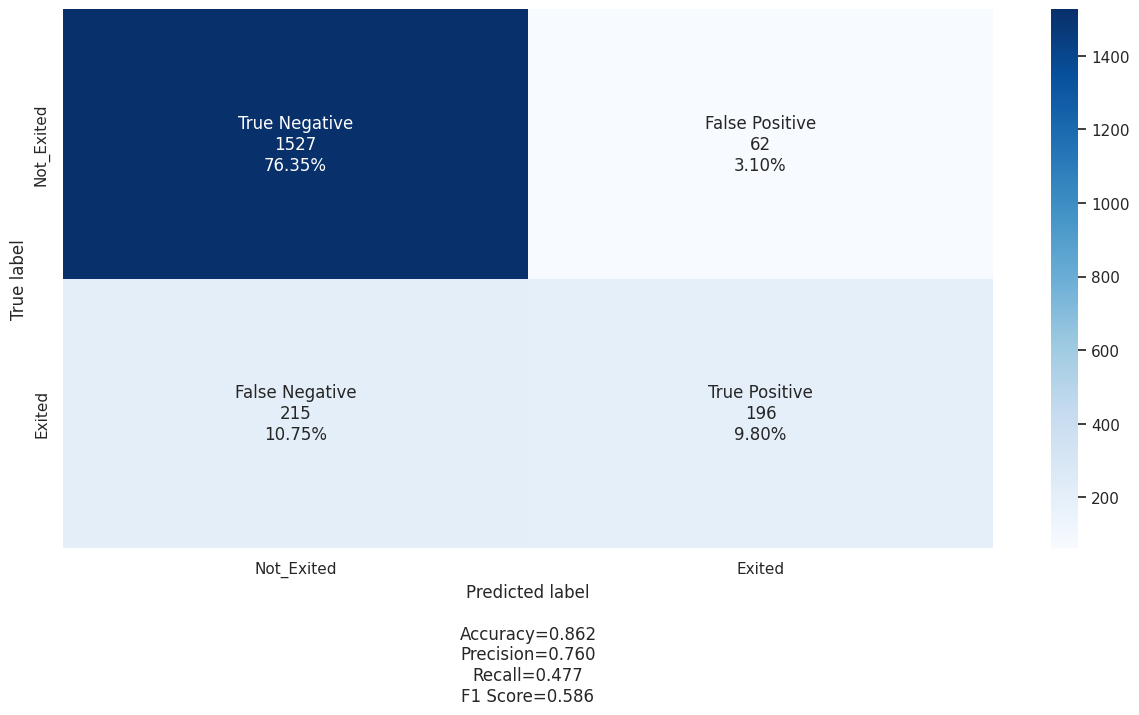

In [ ]:

cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Model can make wrong predictions as:**
* Predicting the customer is leaving the bank but the she is not leaving.
* Predicting the customer is not leaving but she is leaving.

**Which case is more important?**
* Predicting the customer is not leaving but she is leaving (False Negative). In this case, the bank will not focus on not-leaving customers because of the prediction. Then when they leave, the bank lose customer and money.
* The bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing False Negative. Hence, the focus should be on increasing Recall or minimizing the False Negative or in other words identifying the True Positive(i.e. Exited customers) so that the bank can identify the possible customers who are willing to leave the bank.

**Conclusion**
* While only 58 customers are wrongly predicted as leavers (sustomers leaving the bank) , the model detects only 193 leavers. As a consequence 218 leavers are not detected (False Negative).
* Let's see if we can improve this performance with neural network method

## Neural Network Models

### Deep neural network

**NN Model-1**

* We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exited (0) or exited (1).
* A dropout step is included to prevent overfitting.

**Creating a model**
* Keras model object can be created with Sequential class
* At the outset, the model is completed by adding additional layers and compilation.

In [ ]:
#initialize the model
from keras.models import Sequential
model = Sequential()

**Adding layers [layers and activations]**

* Keras layers can be added to the model.
* Adding layers are like stacking lego blocks one by one.
* Since this is a classification problem, sigmoid layer will be added.

In [ ]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns
# hidden layer
model.add(Dense(units=16,activation='relu'))
#Adding Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification exited or not

**Model compile [optimizers and loss functions]**

* Keras model will be "compiled" prior to training.
* Types of loss (function) and optimizer will be designated.

In [ ]:
# Creating optimizer with default learning rate
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

In [ ]:
#printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainabl

**Training [Forward pass and Backpropagation]**

Training the model

In [ ]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=20,validation_split=0.2)

Epoch 1/20
427/427 [==============================] - 3s 4ms/step - loss: 0.5087 - recall: 0.0240 - val_loss: 0.4705 - val_recall: 0.0148
Epoch 2/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4529 - recall: 0.0737 - val_loss: 0.4548 - val_recall: 0.0890
Epoch 3/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4402 - recall: 0.1195 - val_loss: 0.4519 - val_recall: 0.2166
Epoch 4/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4251 - recall: 0.1963 - val_loss: 0.4296 - val_recall: 0.2552
Epoch 5/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4129 - recall: 0.2638 - val_loss: 0.4204 - val_recall: 0.3353
Epoch 6/20
427/427 [==============================] - 1s 2ms/step - loss: 0.3996 - recall: 0.3266 - val_loss: 0.4093 - val_recall: 0.2671
Epoch 7/20
427/427 [==============================] - 1s 2ms/step - loss: 0.3891 - recall: 0.3592 - val_loss: 0.3957 - val_recall: 0.3591
Epoch 8/20
427/427 [==============

Plotting the train and valid loss

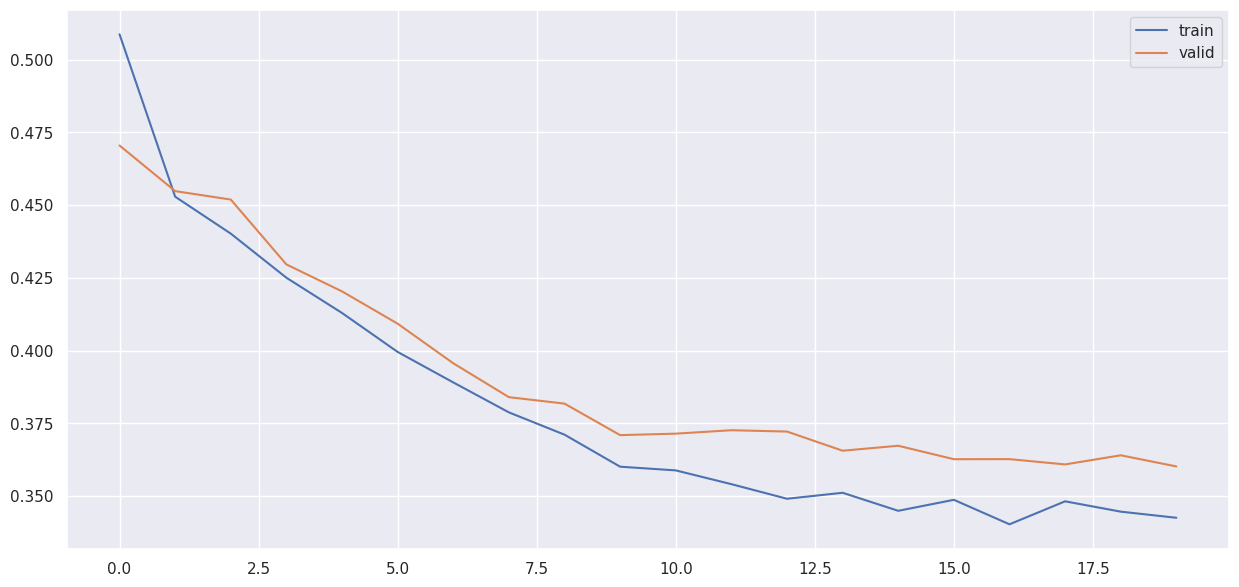

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

* Validation loss is greater than training loss; so we experience overfitting. The overfitting issue was much more significant before I tuned the unit number parameter. It was 24 and I reduced it to 16. Less than 16 is not working either.
* I increased the epoch number but it did not work well so I kept it as 20.

### Evaluation
Keras model can be evaluated with evaluate() function.

In [ ]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3737 - recall: 0.3260


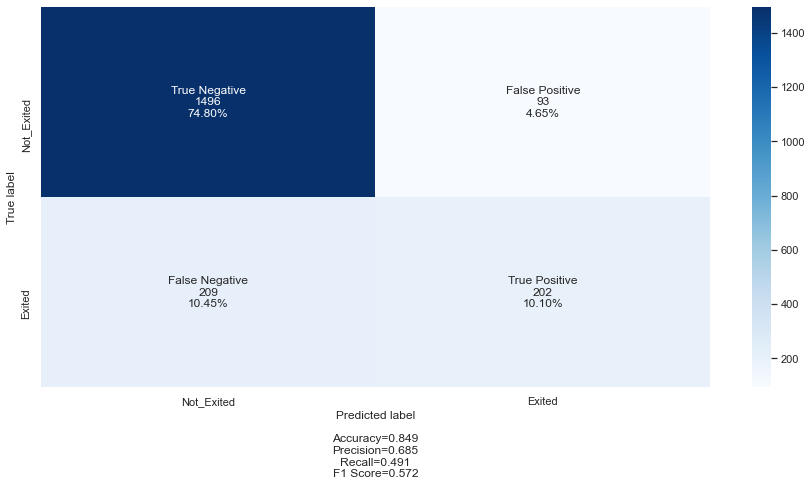

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* Detection of exited customers improved about 2 percent in this NN Model 1 compared to Random Forest; 0.491 vs 0.471.
* There are 411 customer exited in in the test data, yet the model captured only 202 exited customers. It means that 209 actually exited customers are not identified (False Negative). The problem does still exist.
* We should use some other models to further reduce the number of false negative.

**NN Model 2**

* Here, we can use some basic hyperparameters which can help to get better model performance.
* These are Early Stopping and Weight Initialization.

* Early Stopping

In [ ]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,

                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()

#Initializing the weights using RandomNormal
# I selected RandomNormal as it is mostly used initializer in the industry.
# Relu for input activation function and Sigmoid for output

Model2.add(Dense(8, input_shape=(11, ), kernel_initializer='RandomNormal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(8, kernel_initializer='RandomNormal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='RandomNormal', activation='sigmoid'))

# Since Recall is important for this case, we can use Recall() metrics

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=15, epochs=100, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/100
427/427 [==============================] - 2s 2ms/step - loss: 0.5434 - recall_2: 0.0016 - val_loss: 0.4589 - val_recall_2: 0.0000e+00
Epoch 2/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4586 - recall_2: 0.0101 - val_loss: 0.4508 - val_recall_2: 0.0000e+00
Epoch 3/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4567 - recall_2: 0.0481 - val_loss: 0.4470 - val_recall_2: 0.0059
Epoch 4/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4540 - recall_2: 0.0745 - val_loss: 0.4457 - val_recall_2: 0.0059
Epoch 5/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4442 - recall_2: 0.0993 - val_loss: 0.4435 - val_recall_2: 0.0445
Epoch 6/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4443 - recall_2: 0.1210 - val_loss: 0.4429 - val_recall_2: 0.0267
Epoch 7/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4408 - recall_2: 0.1358 - val_loss: 0.4384 - val_recall_2

427/427 [==============================] - 1s 1ms/step - loss: 0.4274 - recall_2: 0.1365 - val_loss: 0.3996 - val_recall_2: 0.1068
Epoch 58/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4216 - recall_2: 0.1761 - val_loss: 0.3995 - val_recall_2: 0.1246
Epoch 59/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4218 - recall_2: 0.1823 - val_loss: 0.4015 - val_recall_2: 0.1335
Epoch 60/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4137 - recall_2: 0.2040 - val_loss: 0.3986 - val_recall_2: 0.1306
Epoch 61/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4237 - recall_2: 0.1846 - val_loss: 0.3975 - val_recall_2: 0.1217
Epoch 62/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4209 - recall_2: 0.1800 - val_loss: 0.4036 - val_recall_2: 0.0772
Epoch 63/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4215 - recall_2: 0.1544 - val_loss: 0.3991 - val_recall_2: 0.1187
Epoch

Plotting the train and validation loss

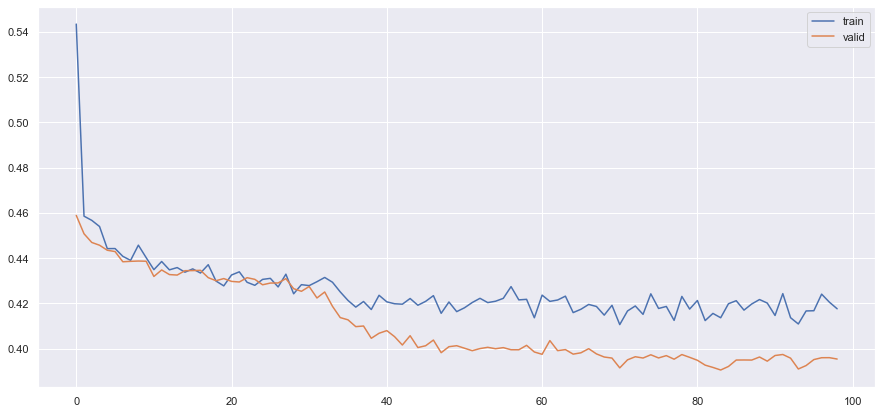

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

* In this case, training loss is more than validation loss. It means that underfitting exists.
* In order to eliminate the underfitting problem, I increased the unit numbers but it did not help.

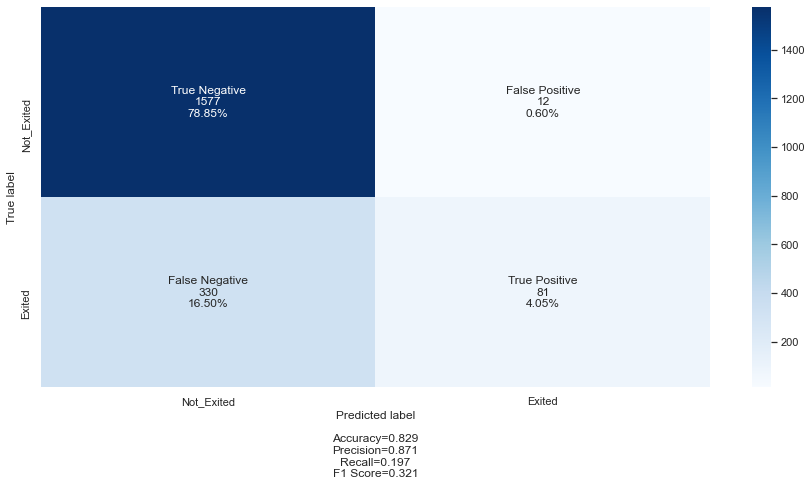

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* In this Early Stopping Model, Recall decreased to 0.197 which is not acceptable.
* This is the worst model so far compared to Random Forest and the Model 1.
* Next model would be Weight Initialization.

**NN Model 3**

* Weighted loss to account for large class imbalance in train dataset.
- We will adjust the class imbalance by giving additional weight to the loss associated to errors made on exited customer detection.

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

- The Exited customers (y=1) is assigned a weight of 2.46 vs 0.63 for the customers not-exited (y=0) due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on Exited cases during training.

In [ ]:
model.fit(X_train,y_train,batch_size=15,epochs=100, class_weight=class_weights, shuffle=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/100
534/534 [==============================] - 2s 2ms/step - loss: 0.4879 - recall: 0.3357
Epoch 2/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4825 - recall: 0.3536
Epoch 3/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4753 - recall: 0.3695
Epoch 4/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4718 - recall: 0.3842
Epoch 5/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4677 - recall: 0.3985
Epoch 6/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4700 - recall: 0.4123
Epoch 7/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4666 - recall: 0.4246
Epoch 8/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4665 - recall: 0.4365
Epoch 9/100
534/534 [==============================] - 1s 2ms/step - l

534/534 [==============================] - 1s 2ms/step - loss: 0.4446 - recall: 0.6700
Epoch 80/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4458 - recall: 0.6710
Epoch 81/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4522 - recall: 0.6720
Epoch 82/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4480 - recall: 0.6729
Epoch 83/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4446 - recall: 0.6738
Epoch 84/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4464 - recall: 0.6747
Epoch 85/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4448 - recall: 0.6757
Epoch 86/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4471 - recall: 0.6765
Epoch 87/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4465 - recall: 0.6774
Epoch 88/100
534/534 [==============================] - 1s 2ms/step - loss: 0.4422 - recall: 0.6782
Epoch 89/100


In [ ]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.6024 - recall: 0.6878


Plotting confusion matrix

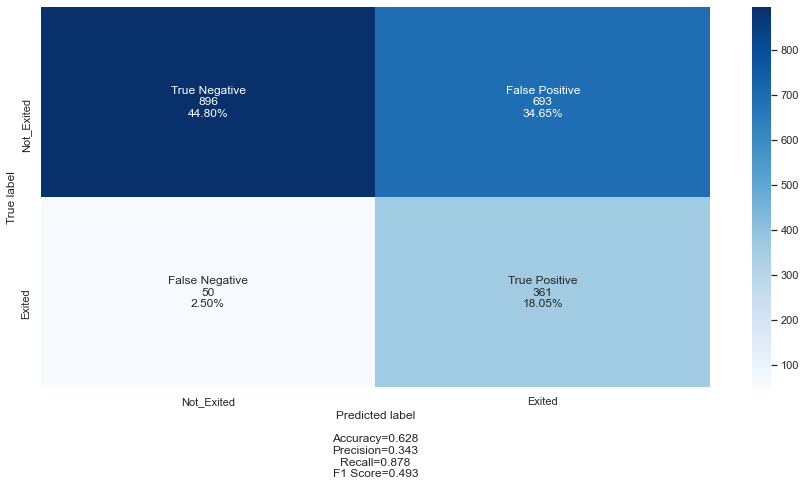

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Conclusion:**
As it is seen from the confusion matrix, Recall significantly increased to 0.878 compared to the Model 1 (0.497). So, this is the best model in terms of Recall. However, accuracy and especially precision is very low. There should be many other improvements:

1) Threshold can be tuned to get the optimal value

2) Before the training data, resampling techniques can be applied to balanced the data

3) There are some overfitting and underfitting problems in the models above. Many different combination of hyperparameter tuning such as unit numbers, drop out rates, batch and epoch numbers can be applied to reach desirable metrics.


* In our analysis, there is a trade of between Model 1 and Model 3. Model 1 has lower Recall(0.49) but higher Accuracy (0.85) and Precision (0.68). Model 3 has a good Recall (0.88) but very low Precision (0.34) and Accuracy (0.63).
* We should select the Model 3 as our final model based on the above analysis.  
